###### This is a small data set.
###### Applied Knn algorthim to figuerout is this ML algorthium is goog to figuer out the number of purchases based on the dependent variables.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np

In [2]:
kn=pd.read_csv("E:/May 29 project review-Knn/data.csv")

In [3]:
kn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# checking the missing values in the data uploaded
kn.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
kn.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
kn.shape

(400, 5)

In [7]:
kn.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
kn['User ID'].value_counts()

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64

In [9]:
#kn['User ID'] = kn['User ID'].str.replace('', '_').astype(int)
#kn['User ID'] = kn['User ID'].str.replace('', '_')

In [10]:
#kn['User ID'] = kn['User ID'].int.replace('', '_')

In [11]:
#kn.drop('USer ID', axis=1, inplace=True)
kn.drop('User ID', axis = 1, inplace = True)

In [12]:
kn['Age'].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [13]:
# 0 & 1 Binary format
kn.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [14]:
kn.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
# doing conversion to a particular column
kn['Gender']=kn['Gender'].replace({'Female':0, 'Male':1})

###### Purchase is the target column for this dataset

In [16]:
# selecting of columns using this .iloc and assigning to the a particualr variable 'X' = Gender, Age, EstimatedSalary
# variable 'Y' = Purchased column
X = kn.iloc[:,0:3].values
Y=kn.iloc[:, 3].values

In [17]:
#spliting the data using into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [20]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
# Graphical representation of the data and to find the out relationship between dependent varibles and target variable & co-relation factor.
import matplotlib.pyplot as plt
import seaborn as sns

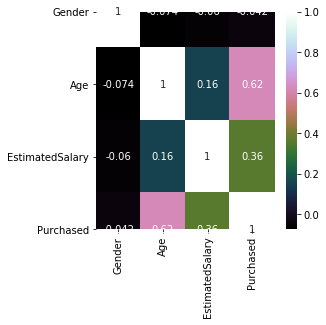

In [21]:
corrmat = kn.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
sns.heatmap(kn.corr(),cmap = 'cubehelix', annot=True)

In [22]:
kn.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [23]:
X = kn[['Gender', 'Age', 'EstimatedSalary']]
Y = kn[['Purchased']]

In [24]:
# K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = KNeighborsClassifier(n_neighbors = 5)

In [26]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
x_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
knn_cm = confusion_matrix(Y_test, y_pred)

In [30]:
knn_cm

array([[46,  6],
       [ 8, 20]], dtype=int64)

In [31]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, make_scorer

In [32]:
print('Accuracy score', accuracy_score(y_pred, Y_test))

Accuracy score 0.825


In [33]:
scorer = make_scorer(f1_score)

In [34]:
print('The Training F1 Score is', f1_score(x_pred, Y_train))
print('The Testing F1 Score is', f1_score(y_pred, Y_test))

The Training F1 Score is 0.822429906542056
The Testing F1 Score is 0.7407407407407408


###### Conclusion: Did some back and fro checking the best accuracy and F1 score.